In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [5]:
path = "../../Risultati/Air_Quality/rf_regression.csv"
df = pd.read_csv(path)
df.head()
df.reset_index(drop=True)
df['percentage'] = 100 - df['percentage']


In [6]:
print(df)

     percentage  outlier     imputation        r2
0           100     none           none  0.963025
1            90     none           none  0.945333
2            90        z           drop  0.946542
3            90        z           LOCF  0.943909
4            90        z           mean  0.930094
..          ...      ...            ...       ...
251          50  iforest  interpolation  0.906194
252          50      hst           drop  0.912754
253          50      hst           LOCF  0.836538
254          50      hst           mean  0.760815
255          50      hst  interpolation  0.830577

[256 rows x 4 columns]


In [7]:
df_neg = df[df['r2']<0]
df_neg

,percentage,outlier,imputation,r2


In [8]:
df.loc[df['r2'] < 0, 'r2'] = 0

In [9]:
df

,percentage,outlier,imputation,r2
0,100,none,none,0.963025
1,90,none,none,0.945333
2,90,z,drop,0.946542
3,90,z,LOCF,0.943909
4,90,z,mean,0.930094
...,...,...,...,...
251,50,iforest,interpolation,0.906194
252,50,hst,drop,0.912754
253,50,hst,LOCF,0.836538
254,50,hst,mean,0.760815


In [10]:
df_grouped = df.groupby(['outlier','imputation']).mean().sort_values(by='r2', ascending=False)
print(df_grouped)

                       percentage        r2
outlier imputation                         
lof     drop            70.000000  0.957542
        LOCF            70.000000  0.941321
        interpolation   70.000000  0.938049
iforest drop            70.000000  0.936372
none    none            74.705882  0.934440
z       LOCF            70.000000  0.927709
        interpolation   70.000000  0.927388
        drop            70.000000  0.927238
hst     drop            70.000000  0.926929
z       mean            70.000000  0.905435
hst     LOCF            68.571429  0.881869
        interpolation   70.000000  0.877579
iforest LOCF            70.000000  0.867799
        interpolation   70.000000  0.866871
hst     mean            70.000000  0.817378
lof     mean            70.000000  0.785595
iforest mean            70.000000  0.648577


In [11]:
df_none = df[(df['outlier'] == 'none')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_none

,percentage,r2
0,50,0.914922
1,60,0.921243
2,70,0.927089
3,80,0.935079
4,90,0.945532
5,100,0.962985


In [12]:
df_lof_LOCF = df[(df['outlier'] == 'lof') & (df['imputation']=='LOCF')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_lof_LOCF

,percentage,r2
0,50,0.931169
1,60,0.936804
2,70,0.941694
3,80,0.946350
4,90,0.950586


In [13]:
df_lof_drop = df[(df['outlier'] == 'lof') & (df['imputation']=='drop')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_lof_drop

,percentage,r2
0,50,0.947565
1,60,0.955555
2,70,0.959039
3,80,0.962210
4,90,0.963343


In [14]:
df_lof_int = df[(df['outlier'] == 'lof') & (df['imputation']=='interpolation')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_lof_int

,percentage,r2
0,50,0.927967
1,60,0.933596
2,70,0.938657
3,80,0.943188
4,90,0.946839


In [15]:
df_if_locf = df[(df['outlier'] == 'iforest') & (df['imputation']=='LOCF')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_if_locf

,percentage,r2
0,50,0.912134
1,60,0.900218
2,70,0.873733
3,80,0.850754
4,90,0.802155


In [16]:
df_hst_locf = df[(df['outlier'] == 'hst') & (df['imputation']=='LOCF')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_hst_locf

,percentage,r2
0,50,0.841540
1,60,0.871627
2,70,0.892541
3,80,0.900571
4,90,0.913666


In [17]:
df_if_locf_all = df[(df['outlier'] == 'iforest') & (df['imputation']=='LOCF')]
df_if_locf_all

,percentage,outlier,imputation,r2
11,90,iforest,LOCF,0.804839
28,80,iforest,LOCF,0.851004
45,70,iforest,LOCF,0.873690
62,60,iforest,LOCF,0.902657
79,50,iforest,LOCF,0.911229
96,90,iforest,LOCF,0.799526
112,80,iforest,LOCF,0.850283
129,70,iforest,LOCF,0.873403
146,60,iforest,LOCF,0.894714
163,50,iforest,LOCF,0.910112


In [18]:
df_z_locf = df[(df['outlier'] == 'z') & (df['imputation']=='LOCF')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_z_locf

,percentage,r2
0,50,0.913892
1,60,0.919887
2,70,0.926857
3,80,0.933715
4,90,0.944192


[]

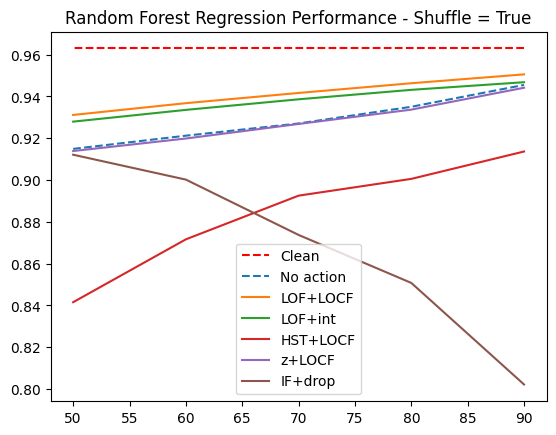

In [19]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['r2'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['r2'].iloc[:-1], '--', label='No action')
plt.plot(df_lof_LOCF['percentage'],df_lof_LOCF['r2'], label='LOF+LOCF')
plt.plot(df_lof_int['percentage'],df_lof_int['r2'], label='LOF+int')
plt.plot(df_hst_locf['percentage'],df_hst_locf['r2'], label='HST+LOCF')
plt.plot(df_z_locf['percentage'],df_z_locf['r2'], label='z+LOCF')
plt.plot(df_if_locf['percentage'],df_if_locf['r2'], label='IF+drop')
plt.title("Random Forest Regression Performance - Shuffle = True")
plt.legend()
plt.plot()

In [20]:
#Completeness + regression
#outlier + regression con nan_to_num
#inject none e outliers e provare prima uno e poi l'altro
#rifare tutto con un altro dataset